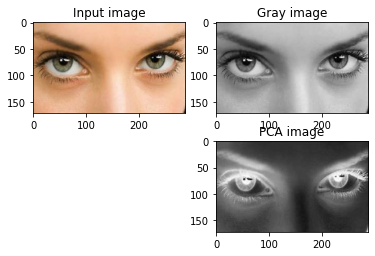

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2



#lINEARIZZO L'IMMAGINE
def lin_image(base_image):
    (H,W,channel) = np.shape(base_image) #prendo la forma altezza,larghezza e canali
    lin_image = base_image.reshape(H*W,channel).squeeze()  # linearizzo
    return lin_image

#Delinearizzare un'immagine pre-linearizzata
def unlin_image(in_image,H,W):
    (L,channel) = np.shape(in_image) #Prendo la forma per lunghezza
    #Vado a verificare le possibili dimensioni dell'immagine
    if L != H*W:
        raise ValueError('The length of the image does not correspond to the Height and width input')
    # delinearizzo
    ##Numpy squeeze() restituisce l'array di input con il sottoinsieme della dimensione avente una lunghezza uguale a uno rimosso dall'array.
    base_image = in_image.reshape(H,W,channel).squeeze()
    return base_image

## Calcolo il PCA dell'immagine
def PCAImage(image,n_components=1):
    # Ottengo la dimensione dell'immagine
    (H, W, ch) = np.shape(image)

    #Crea un oggetto PCA dalla libreria scikit-learn
    sklearn_pca = PCA(n_components=n_components)

    #Applicare il PCA all'immagine linearizzata
    lin_pca = sklearn_pca.fit_transform(lin_image(image))

    #Trasformo l'immagine linearizzata in immagine normale
    out_pca = unlin_image(lin_pca, H, W)

    #cast dell'immagine di output nel formato uint8 (0-255)
    out_pca = np.uint8((out_pca - np.min(out_pca)) * 255 / (np.max(out_pca) - np.min(out_pca)))
    return out_pca


#importo e stampo un immagine 
def imageExample():
    #Leggo l'immagine e calcolo la trasformazione in scala di grigi
    input_image =cv2.imread('/content/drive/MyDrive/progettoCV&DL/esercizio iniziale/DATASET/6.PNG')
    input_image= cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB) #HO MESSO QUESTA RIGA ALTRIMENTI FALSA IL COLORE

    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    pca_image = PCAImage(input_image, n_components=1) #mi cambia il colore pca

    # Il primo grafico mostra l'immagine originale, il secondo in cala di grigi, il terzo con metodo PCA
    plt.figure()
    plt.subplot(2,2,1)
    plt.title('Input image')
    plt.imshow(input_image)
   

    plt.subplot(2,2,2)
    plt.title('Gray image')
    plt.imshow(gray_image, cmap='gray')

    plt.subplot(2,2,4)
    plt.title('PCA image')
    plt.imshow(pca_image, cmap='gray')
    plt.show()

## main program
if __name__ == '__main__':
    imageExample()

